In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
df = sns.load_dataset('titanic')
print("✅ Titanic Dataset Loaded Successfully!\n")
df.head()


✅ Titanic Dataset Loaded Successfully!



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("\n📋 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n📊 Basic Statistics:")
print(df.describe(include='all'))



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

🔍 Missing Values:
survived         0
pclass           0


In [4]:
# Drop columns with too many missing values
df.drop(['deck'], axis=1, inplace=True)

# Fill missing age with median, embarked with mode
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print("\n✅ Missing values handled successfully!")
print(df.isnull().sum())



✅ Missing values handled successfully!
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


/tmp/ipython-input-625216277.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-625216277.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

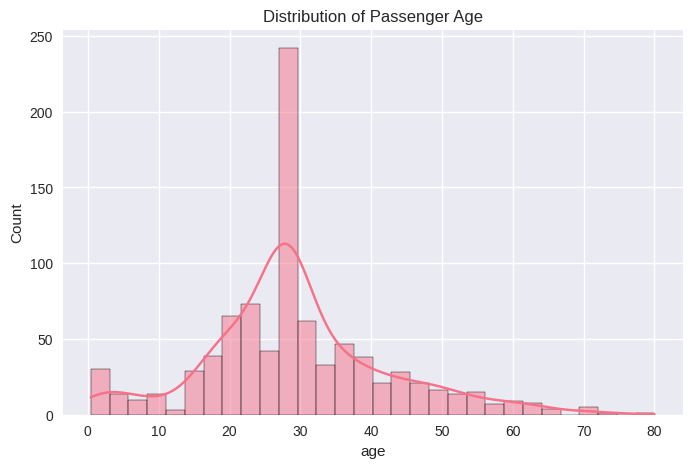

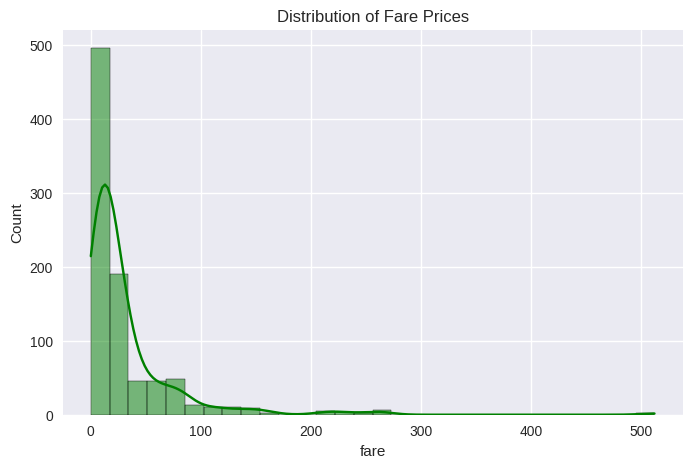

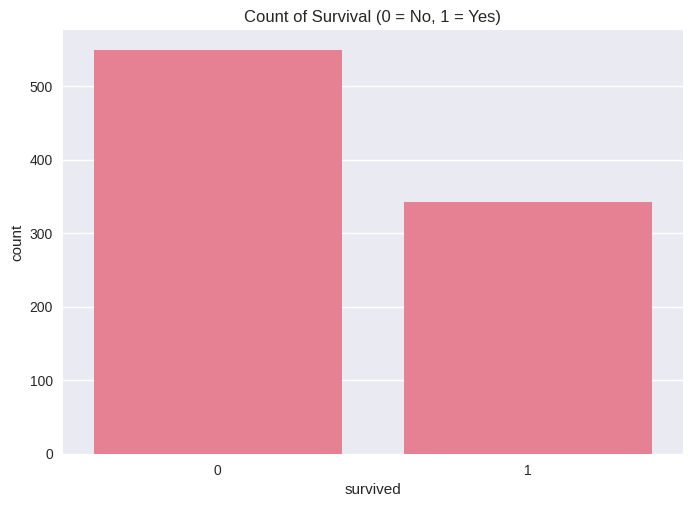

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Passenger Age")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['fare'], bins=30, kde=True, color='green')
plt.title("Distribution of Fare Prices")
plt.show()

sns.countplot(x='survived', data=df)
plt.title("Count of Survival (0 = No, 1 = Yes)")
plt.show()



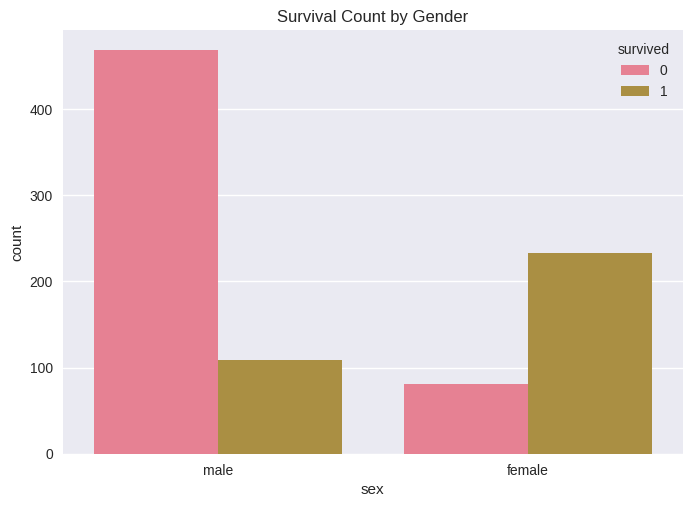

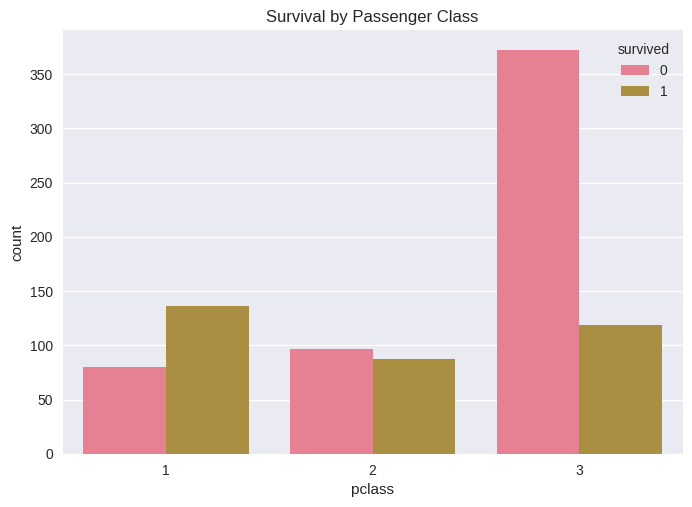

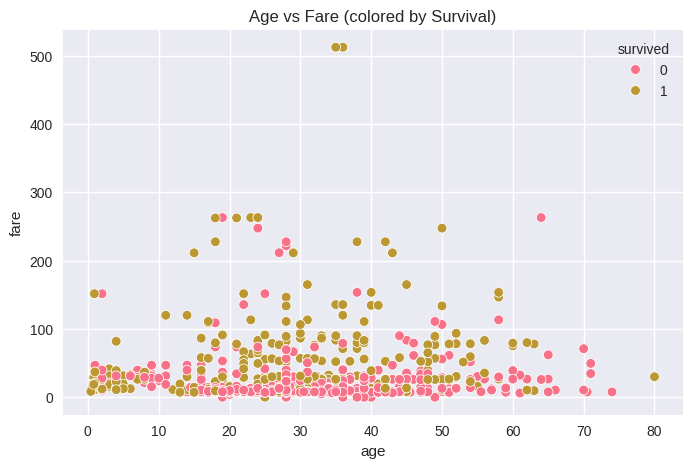

In [6]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")
plt.show()


sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (colored by Survival)")
plt.show()



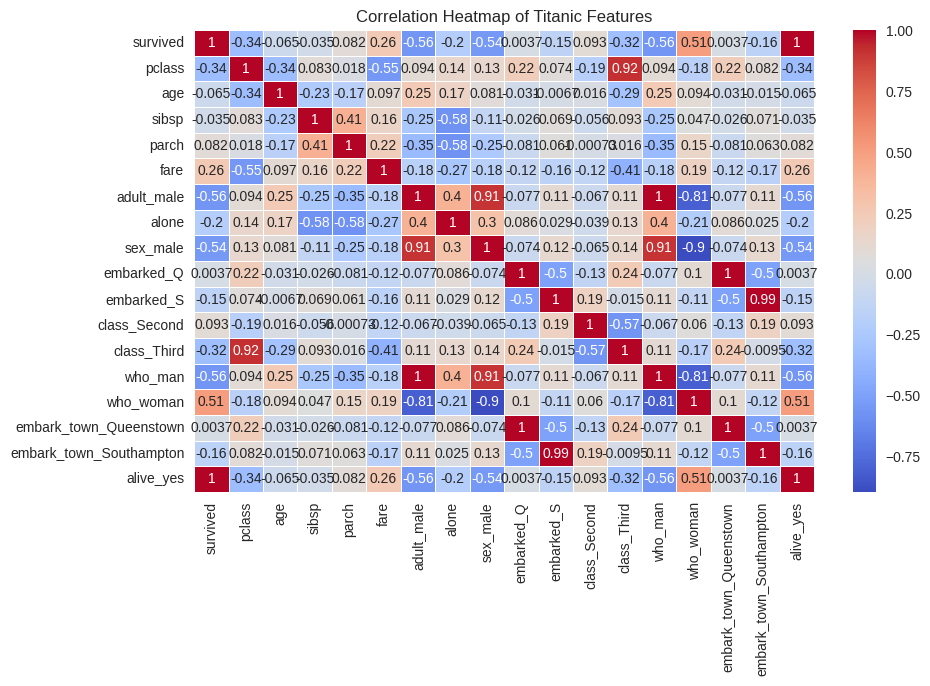

In [7]:
# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Features")
plt.show()
